# **Free Fall Simulation of  ₱20-Peso Coins on Different Planets in Our Solar System**

## Introduction
The study of free fall is an essential part of understanding gravitational forces and their effect on objects. Objects of the same mass, such as a coin, will fall at different rates depending on the planet's gravitational pull. Gravitational acceleration is a key factor in determining the speed at which an object falls toward the surface of a celestial body. On Earth, we are accustomed to the acceleration due to gravity being approximately 9.81 m/s². However, this value varies greatly across different planets in our solar system, influencing the rate at which objects fall.

---

## Planets in the Simulation:
- **Mercury**: Gravity = 3.7 m/s²  
- **Venus**: Gravity = 8.87 m/s²  
- **Earth**: Gravity = 9.8 m/s²  
- **Mars**: Gravity = 3.71 m/s²  
- **Jupiter**: Gravity = 24.79 m/s²  
- **Saturn**: Gravity = 10.44 m/s²  
- **Uranus**: Gravity = 8.69 m/s²  
- **Neptune**: Gravity = 11.15 m/s²  
- **Pluto**: Gravity = 0.62 m/s²  

---

## How the Simulation Works:

## 1. **Equation for Height (\(yf\))**:

## $$y_f = y0 + v0 t + \frac{1}{2} g t^2$$

### Where:
- \(yf\): Height of the object at any given time  
- \(y0\): Initial height (e.g., 100 meters in this case)  
- \(v0\): Initial velocity (0 m/s, since the coin is initially at rest)  
- \(g\): Gravitational acceleration for the planet  
- \(t\): Time in seconds  

---

## 2. **Equation for Final Velocity (\(v_f\))**:

### $$vf = v_0 + g \cdot t$$

### Explanation:
The velocity of the coin increases over time due to gravitational acceleration.

---

## 3. **Fall Time Formula (\(T\))**:

To calculate the time it takes for the coin to hit the ground, we use:

## $$T = \sqrt{\frac{2y0}{g}}$$

### Where:
- \(y0\): Initial height (in meters)  
- \(g\): Gravitational acceleration (in m/s²)  

This formula comes from rearranging the equation of motion:

## $$y = v_0 t + \frac{1}{2} g t^2$$

---

## 4. **Final Velocity Formula (\(V_f\))**:

To calculate the velocity just before the coin hits the ground:

### $$Vf = \sqrt{2 g y0}$$

### Where:
- \(g\): Gravitational acceleration (in m/s²)  
- \(y0\): Initial height (in meters)  

This formula derives from the kinematic equation:

### $$v^2 = v_0^2 + 2 g y$$
---

## Key Points:
- **Fall Time (\(T\))**: The duration of free fall from height \(y_0\).  
- **Final Velocity (\(V_f\))**: The speed of the coin just before it hits the ground.  

---

## Example Calculation for Earth:
- Let’s assume the coin is dropped from \(y0 = 100\) meters.  
- The acceleration due to gravity on Earth is \(g = 9.81 \, \text{m/s}^2\).  

**Fall Time**:

## $$T = \sqrt{\frac{2 \times 100}{9.81}} \approx 4.52 \, \text{seconds}$$


**Final Velocity**

## $$Vf = \sqrt{2 \times 9.81 \times 100} \approx 44.29 \, \text{m/s}$$

---

## Summary:
This simulation explores how gravitational acceleration impacts the free fall of a 20-peso coin on different planets. By observing differences in fall time and final velocity, we can understand the varying effects of planetary gravity.


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

import math

planetary_gravity = {
    "Mercury": 3.7,
    "Venus": 8.87,
    "Earth": 9.81,
    "Mars": 3.71,
    "Jupiter": 24.79,
    "Saturn": 10.44,
    "Uranus": 8.69,
    "Neptune": 11.15,
}

# Simulation constants
v0 = 0  # Initial velocity (m/s)
y0 = 100  # Initial height (m)
dt = 0.5  # Time step (s)

# Create motion data for each planet
data = []
planet_data = {}

for planet, gravity in planetary_gravity.items():
    # Calculate exact free fall time and final velocity based on formulae
    fall_time = math.sqrt(2 * y0 / gravity)  # Time to fall from height y0
    final_velocity = math.sqrt(2 * gravity * y0)  # Final velocity just before impact

    # Store the planet data for the table
    data.append([planet, v0, gravity, round(fall_time, 2), round(final_velocity, 2)])

    # Store the data for plotting (simplified)
    times = [round(fall_time, 2)]
    heights = [0]  # The height at fall_time is 0

    planet_data[planet] = {"time": times, "height": heights}

# Create a DataFrame to represent the results as a table
df = pd.DataFrame(data, columns=["Planet", "V0 (m/s)", "G (m/s²)", "T (s)", "Vf (m/s)"])

sorted_df = df.sort_values(by='T (s)')
# Display the table
print(sorted_df)


    Planet  V0 (m/s)  G (m/s²)  T (s)  Vf (m/s)
4  Jupiter         0     24.79   2.84     70.41
7  Neptune         0     11.15   4.24     47.22
5   Saturn         0     10.44   4.38     45.69
2    Earth         0      9.81   4.52     44.29
1    Venus         0      8.87   4.75     42.12
6   Uranus         0      8.69   4.80     41.69
3     Mars         0      3.71   7.34     27.24
0  Mercury         0      3.70   7.35     27.20


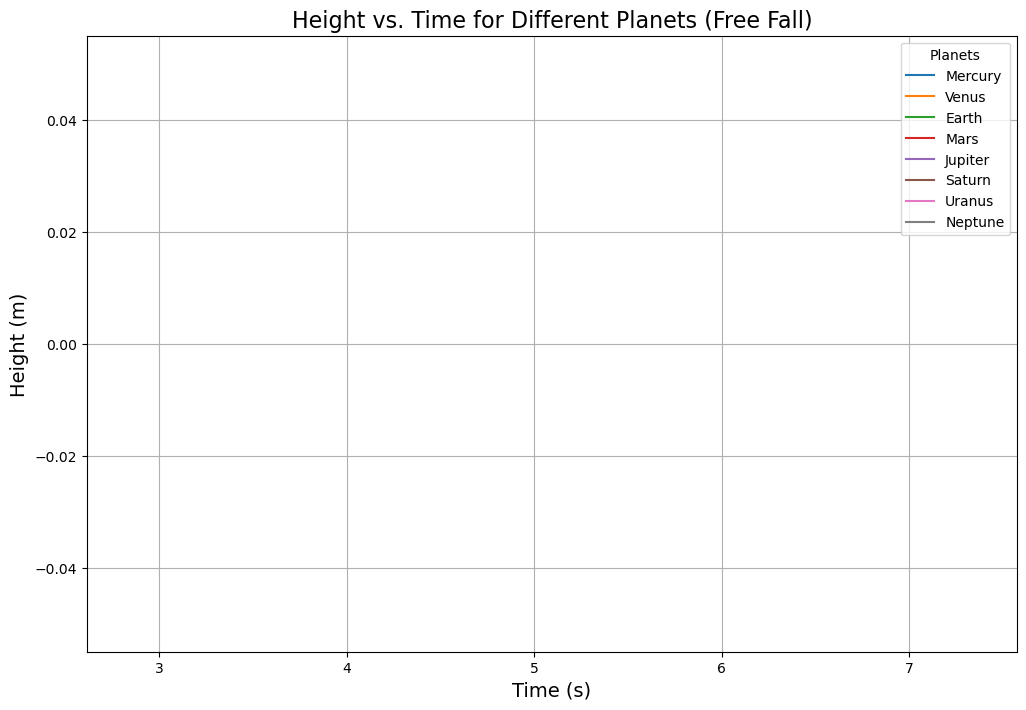

In [52]:
plt.figure(figsize=(12, 8))

for planet, motion_data in planet_data.items():
    plt.plot(motion_data["time"], motion_data["height"], label=planet)

# Customize the plot
plt.title("Height vs. Time for Different Planets (Free Fall)", fontsize=16)
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Height (m)", fontsize=14)
plt.legend(title="Planets")
plt.grid(True)

# Show the plot
plt.show()

In [47]:
import pygame

# Initialize Pygame
pygame.init()

# Screen dimensions
WIDTH, HEIGHT = 800, 600
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Coin Drop Simulation for Planets")

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GOLD = (255, 215, 0)
GRAY = (200, 200, 200)
DARK_GRAY = (100, 100, 100)

# Planetary gravities (m/s^2)
planetary_gravity = {
    "Mercury": 3.7,
    "Venus": 8.87,
    "Earth": 9.81,
    "Mars": 3.71,
    "Jupiter": 24.79,
    "Saturn": 10.44,
    "Uranus": 8.69,
    "Neptune": 11.15,
    "Pluto": 0.62,
}

# Simulation constants
y0 = 100  # Initial height (m)
v0 = 0    # Initial velocity (m/s)
dt = 0.05  # Time step (s)
pixels_per_meter = 5  # Scaling for visualization (adjust as needed)

# Coin properties
coin_radius = 15
vertical_margin = 50  # Distance from the top of the screen

# Function to reset the simulation
def reset_simulation():
    coins = []
    for i, (planet, gravity) in enumerate(planetary_gravity.items()):
        coins.append({
            "planet": planet,
            "x": 100 + i * 70,  # Horizontally spaced coins
            "y": vertical_margin,  # Starting near the top of the screen
            "v": v0,
            "g": gravity,
            "falling": True,
        })
    return coins

# Initialize coin data
coins = reset_simulation()

# Button properties
button_width = 200
button_height = 40
button_x = (WIDTH - button_width) // 2
button_y = HEIGHT - 60

# Font for labels
font = pygame.font.SysFont(None, 24)

# Main simulation loop
running = True
clock = pygame.time.Clock()

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        elif event.type == pygame.MOUSEBUTTONDOWN:
            # Check if the button was clicked
            mouse_x, mouse_y = event.pos
            if button_x <= mouse_x <= button_x + button_width and button_y <= mouse_y <= button_y + button_height:
                coins = reset_simulation()  # Reset the simulation

    # Clear screen
    screen.fill(BLACK)

    # Update coin positions and draw them
    for coin in coins:
        if coin["falling"]:
            coin["v"] += coin["g"] * dt  # Update velocity
            coin["y"] += coin["v"] * dt * pixels_per_meter  # Update position

            if coin["y"] >= HEIGHT - coin_radius:  # Check if coin hits the ground
                coin["y"] = HEIGHT - coin_radius
                coin["falling"] = False  # Stop falling when it hits the ground

        # Draw the coin
        pygame.draw.circle(screen, GOLD, (int(coin["x"]), int(coin["y"])), coin_radius)

        # Draw the planet label
        label = font.render(coin["planet"], True, WHITE)
        screen.blit(label, (coin["x"] - coin_radius, coin["y"] + coin_radius + 5))

    # Draw the "Restart Simulation" button
    pygame.draw.rect(screen, GRAY, (button_x, button_y, button_width, button_height))
    button_text = font.render("Restart Simulation", True, BLACK)
    screen.blit(button_text, (button_x + 20, button_y + 10))

    # Highlight button on hover
    mouse_x, mouse_y = pygame.mouse.get_pos()
    if button_x <= mouse_x <= button_x + button_width and button_y <= mouse_y <= button_y + button_height:
        pygame.draw.rect(screen, DARK_GRAY, (button_x, button_y, button_width, button_height), 3)

    # Update display
    pygame.display.flip()


    # Control the frame rate
    clock.tick(60)

pygame.quit()